In [1]:
import pandas as pd

# URL of the CSV file
url = 'https://raw.githubusercontent.com/imharshitaa/IBM-AI-certification-capstone-project/main/traffic_data.csv'

# Read the CSV file from GitHub
data = pd.read_csv(url)

# Display the first few rows of the data
print(data.head())

          Timestamp   Latitude   Longitude Road ID  Speed (km/h) Traffic Flow  \
0  07-09-2024 08:00  40.741722 -116.231641      R8     23.953746       Medium   
1  07-09-2024 09:00  51.112858  -43.694392      R4     98.365680        Light   
2  07-09-2024 10:00  47.175891  -82.308718      R1     85.504015        Light   
3  07-09-2024 11:00  44.775853  -59.022374      R8     87.436416        Heavy   
4  07-09-2024 12:00  36.808336  -11.182780      R4     32.522622        Light   

   Vehicle Count Weather Conditions   Incident Reports Day of Week  \
0            813               Rain                NaN    Saturday   
1            138              Clear  Accident Reported      Sunday   
2           1249             Cloudy                NaN      Monday   
3            272               Rain       Construction     Tuesday   
4            752              Clear  Accident Reported   Wednesday   

   Hour of Day  
0            8  
1            9  
2           10  
3           11  
4      

In [17]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Preprocessing
## Handle missing values
data.fillna(method='ffill', inplace=True)

## Encode categorical variables
label_encoder = LabelEncoder()
data['Weather Conditions'] = label_encoder.fit_transform(data['Weather Conditions'])
data['Incident Reports'] = label_encoder.fit_transform(data['Incident Reports'])
data['Day of Week'] = label_encoder.fit_transform(data['Day of Week'])

# Feature selection
features = ['Latitude', 'Longitude', 'Speed (km/h)', 'Traffic Flow', 'Vehicle Count',
            'Weather Conditions', 'Incident Reports', 'Day of Week', 'Hour of Day']
X = data[features]
y = data['Traffic Flow']  # Target variable

<ipython-input-18-0be7f2e6158e>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Sample DataFrame loading (replace with your data loading method)
# df = pd.read_csv('your_data.csv')

# Assuming 'y' is your target variable
# y = df['target_column']
# X = df.drop(columns=['target_column'])

# One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model development
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [21]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[5 0 0]
 [0 9 0]
 [0 0 6]]

Classification Report:
              precision    recall  f1-score   support

       Heavy       1.00      1.00      1.00         5
       Light       1.00      1.00      1.00         9
      Medium       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



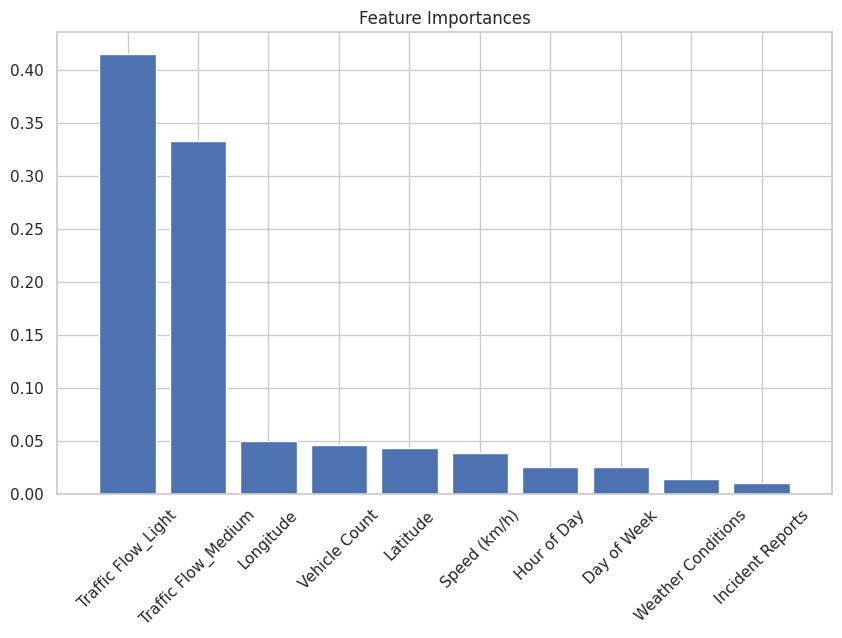

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'X' is your feature DataFrame after one-hot encoding
# Get the feature importances and their indices
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the feature names after one-hot encoding
feature_names = X.columns  # Updated to get the correct feature names

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()
